In [95]:
import pandas as pd
import numpy as np
import json
import pickle
import joblib
import matplotlib.pyplot as plt
import matplotlib as mpl
import dataframe_image as dfi

from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, roc_auc_score

In [96]:
bars_color="gray"

In [97]:

def plot_figure(fig_width=2, fig_height=2):
    #define apeearance of figures

    COLOR = 'black'


    # Edit the font, font size, color and axes width

    plt.rcParams['font.size'] = 15
    plt.rcParams['axes.linewidth'] = 0.5

    tick_size=3
    mpl.rcParams['font.family'] = 'Arial'
    mpl.rcParams['text.color'] = COLOR
    mpl.rcParams['axes.labelcolor'] = COLOR
    mpl.rcParams['axes.edgecolor'] = COLOR
    mpl.rcParams['xtick.color'] = COLOR
    mpl.rcParams['ytick.color'] = COLOR


    # Create figure object and store it in a variable called 'fig'
    fig = plt.figure(figsize=(fig_width, fig_height))

    # Add axes object to the figure that takes up entire figure
    ax = fig.add_axes([0, 0, 1, 1])


    # Edit the major and minor ticks of the x and y axes
    ax.xaxis.set_tick_params(which='major', size=tick_size, width=plt.rcParams['axes.linewidth'], direction='in', top='on')
    ax.xaxis.set_tick_params(which='minor', size=tick_size, width=plt.rcParams['axes.linewidth'], direction='in', top='on')
    ax.yaxis.set_tick_params(which='major', size=tick_size, width=plt.rcParams['axes.linewidth'], direction='in', right='on')
    ax.yaxis.set_tick_params(which='minor', size=tick_size, width=plt.rcParams['axes.linewidth'], direction='in', right='on')

    return fig, ax






def get_metrics(y_test, y_pred):
    predicted_for_discharge = list(np.where(y_pred == False)[0])
    wrongful_discharge = y_test.reset_index(drop=True)[predicted_for_discharge].sum()/len(predicted_for_discharge)
    print(f"WRONGFUL DISCHARGE RATE: {wrongful_discharge}")

    print(f"F1_SCORE: {f1_score(y_test, y_pred)}")
    print(f"RECALL: {recall_score(y_test, y_pred)}")
    print(f"PRECISION: {precision_score(y_test, y_pred)}")

    

    try:
        print(f"ROC AUC: {roc_auc_score(y_test, y_pred)}")
    except: "ROC AUC curve could not be calculated"




def check_for_bias(df_test, column_name, preds_proba_column, threshold=0.5, min_size=0):
    df = df_test.copy().dropna()

    sub_groups = []
    wrongful_discharges = []
    lengths = []

    for sub_group in df[column_name].unique():
        df_subgroup = df[df[column_name] == sub_group]
        y_test = df_subgroup["readmitted"]
            #y_pred_test = pipeline.predict(X_test)
        if len(y_test)>=min_size:

            best_preds_test = df_subgroup[preds_proba_column]>threshold

                
            predicted_for_discharge = list(np.where(best_preds_test == False)[0])
            wrongful_discharge = y_test.reset_index(drop=True)[predicted_for_discharge].sum()/len(predicted_for_discharge)

            sub_groups.append(sub_group)
            wrongful_discharges.append(wrongful_discharge)
            lengths.append(len(df_subgroup))

    df = pd.DataFrame([sub_groups, wrongful_discharges, lengths]).transpose()
    df.columns =["sub_group", "readmittion_rate", "size_of_test_data"]
    #df.hist
    return df

            



In [98]:
with open('columns.json') as fh:
    columns = json.load(fh)


with open('dtypes.pickle', 'rb') as fh:
    dtypes = pickle.load(fh)

In [99]:
df_test = pd.read_csv("test_set.csv")


In [115]:
for algorithm in ["LogisticRegression", "DecisionTreeClassifier", "RandomForestClassifier", "GradientBoostingClassifier", "SVC"]:
    pipeline = joblib.load("pipelines/pipeline_"+algorithm+".pickle")
    if algorithm=="SVC":
        df_test["pred_proba_"+algorithm] = pipeline.predict(df_test[columns])
        df_test["pred_proba_"+algorithm] = df_test["pred_proba_"+algorithm].replace([True, False], [1, 0])
    else:
        df_test["pred_proba_"+algorithm] = pipeline.predict_proba(df_test[columns])[:, 1]
    
    print(pipeline.named_steps['gridsearchcv'].best_params_)



{'C': 0.01, 'penalty': 'l2'}
{'max_depth': 5}
{'max_depth': 5, 'n_estimators': 500}
{'max_depth': 3, 'n_estimators': 100}
{'C': 1, 'kernel': 'rbf'}


LogisticRegression
Other 12.068965517241379
Hispanic 0.0
12.068965517241379
#######
DecisionTreeClassifier
Other 8.88888888888889
Hispanic 0.0
8.88888888888889
#######
RandomForestClassifier
Other 9.803921568627452
Hispanic 1.5873015873015872
8.216619981325865
#######
GradientBoostingClassifier
Other 10.909090909090908
Hispanic 0.0
10.909090909090908
#######
SVC
African American 9.090909090909092
Hispanic 0.0
9.090909090909092
#######


[0204/201017.597865:ERROR:gpu_init.cc(441)] Passthrough is not supported, GL is swiftshader
[0204/201018.364306:INFO:headless_shell.cc(648)] Written to file /tmp/tmpv337zisn/temp.png.


LogisticRegression
[90-100) 9.230769230769232
[30-40) 3.816793893129771
5.41397533763946
#######
DecisionTreeClassifier
[60-70) 8.345323741007196
[30-40) 2.083333333333333
6.261990407673863
#######
RandomForestClassifier
[60-70) 8.047493403693931
[30-40) 2.6548672566371683
5.392626147056763
#######
GradientBoostingClassifier
[60-70) 8.418367346938775
[30-40) 2.7027027027027026
5.715664644236072
#######
SVC
[90-100) 8.620689655172415
[30-40) 3.225806451612903
5.394883203559512
#######


[0204/201021.326183:ERROR:gpu_init.cc(441)] Passthrough is not supported, GL is swiftshader
[0204/201021.947352:INFO:headless_shell.cc(648)] Written to file /tmp/tmpxq3q_d3k/temp.png.


LogisticRegression
Male 7.2565245066836415
Female 6.904109589041097
0.3524149176425446
#######
DecisionTreeClassifier
Female 6.642857142857143
Male 6.3028439661798625
0.3400131766772807
#######
RandomForestClassifier
Male 6.844626967830253
Female 6.282722513089005
0.5619044547412484
#######
GradientBoostingClassifier
Female 6.587537091988131
Male 6.583278472679395
0.004258619308735945
#######
SVC
Male 7.156798959011061
Female 6.402793946449361
0.7540050125617004
#######


[0204/201023.905060:ERROR:gpu_init.cc(441)] Passthrough is not supported, GL is swiftshader
[0204/201024.456788:INFO:headless_shell.cc(648)] Written to file /tmp/tmp_5g_6oy6/temp.png.


LogisticRegression
True 7.302231237322515
False 5.47945205479452
1.822779182527995
#######
DecisionTreeClassifier
True 6.567796610169492
False 5.865102639296188
0.7026939708733044
#######
RandomForestClassifier
True 6.625813864419762
False 6.084656084656085
0.5411577797636777
#######
GradientBoostingClassifier
True 6.640485540878258
False 6.20347394540943
0.43701159546882806
#######
SVC
True 6.873457878040183
False 5.980861244019139
0.8925966340210438
#######


[0204/201026.438334:ERROR:gpu_init.cc(441)] Passthrough is not supported, GL is swiftshader
[0204/201027.058814:INFO:headless_shell.cc(648)] Written to file /tmp/tmp3ga5qrih/temp.png.
/tmp/ipykernel_67667/3473811136.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(fig_width, fig_height))


LogisticRegression
Pulmonology 12.195121951219512
Psychiatry 2.380952380952381
9.814169570267131
#######
DecisionTreeClassifier
Gastroenterology 15.0
Psychiatry 4.166666666666666
10.833333333333334
#######
RandomForestClassifier
Surgery-Cardiovascular/Thoracic 12.5
Psychiatry 2.564102564102564
9.935897435897436
#######
GradientBoostingClassifier
Nephrology 11.956521739130435
Psychiatry 2.3255813953488373
9.630940343781598
#######
SVC
Pulmonology 13.157894736842104
Psychiatry 2.5
10.657894736842104
#######


[0204/201030.501276:ERROR:gpu_init.cc(441)] Passthrough is not supported, GL is swiftshader
[0204/201031.100013:INFO:headless_shell.cc(648)] Written to file /tmp/tmpbbre8i9p/temp.png.


LogisticRegression
5.0 13.333333333333334
1.0 6.4628214037526055
6.870511929580728
#######
DecisionTreeClassifier
6.0 7.954545454545454
5.0 0.0
7.954545454545454
#######
RandomForestClassifier
6.0 9.375
5.0 0.0
9.375
#######
GradientBoostingClassifier
6.0 9.523809523809524
1.0 6.280875088214538
3.242934435594986
#######
SVC
5.0 10.0
1.0 6.373937677053824
3.6260623229461757
#######


[0204/201033.242231:ERROR:gpu_init.cc(441)] Passthrough is not supported, GL is swiftshader
[0204/201033.792357:INFO:headless_shell.cc(648)] Written to file /tmp/tmp_i57duzs/temp.png.


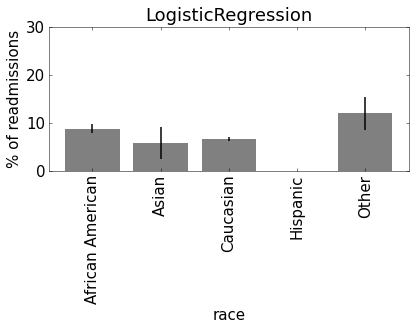

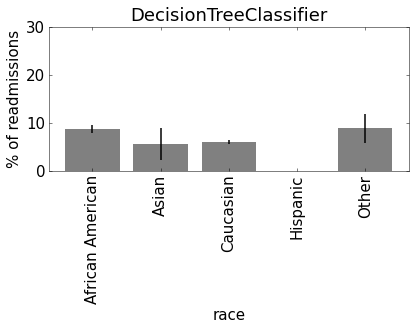

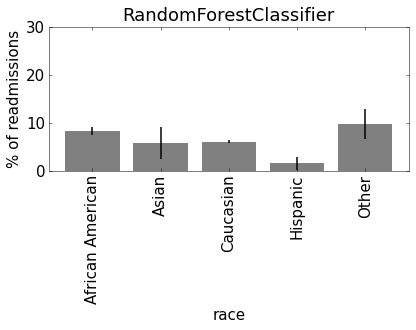

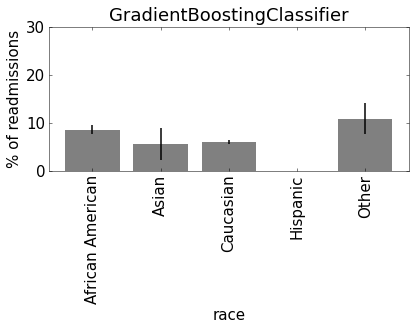

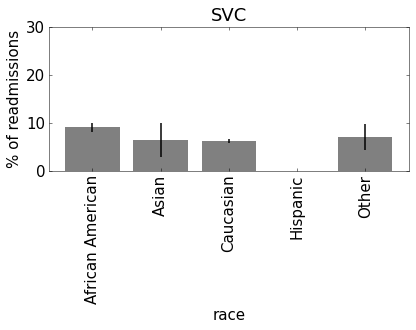

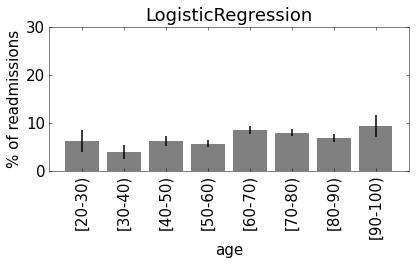

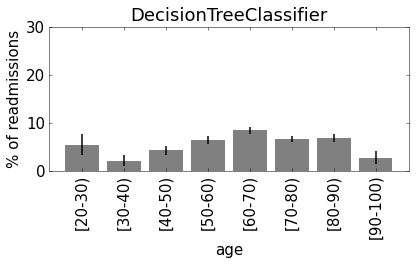

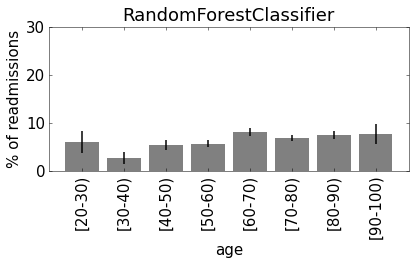

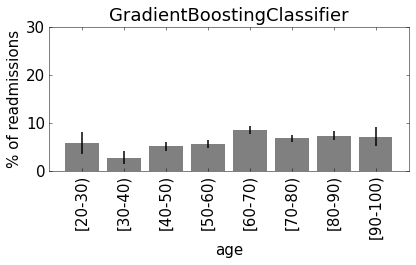

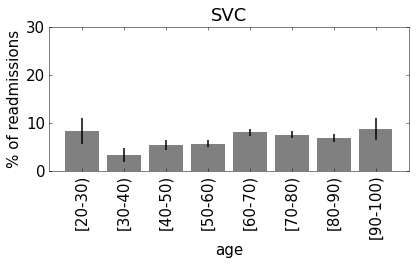

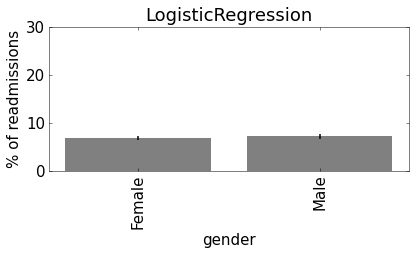

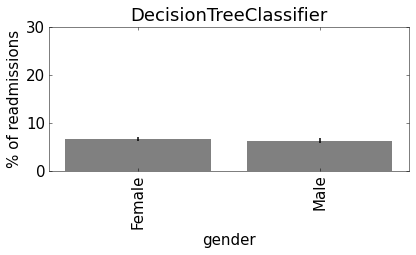

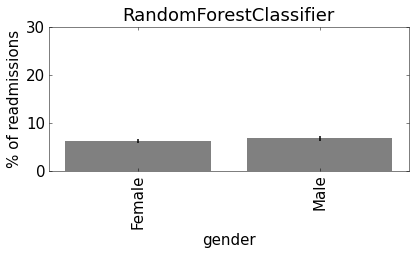

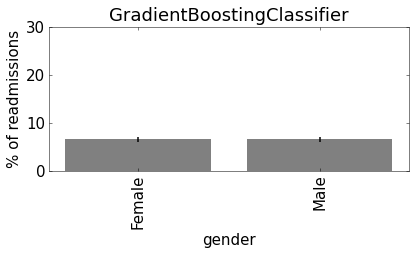

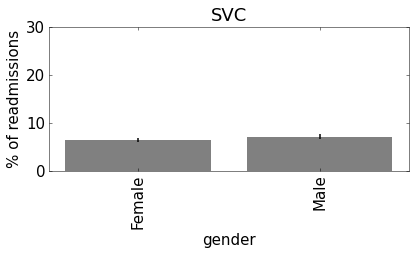

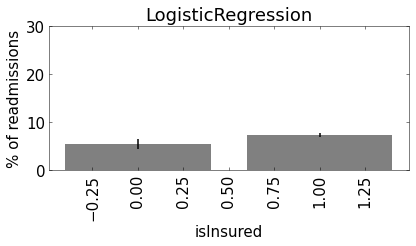

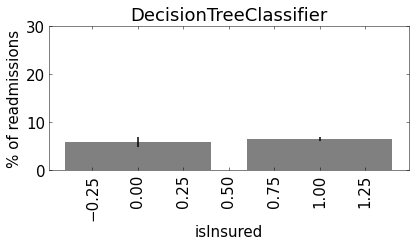

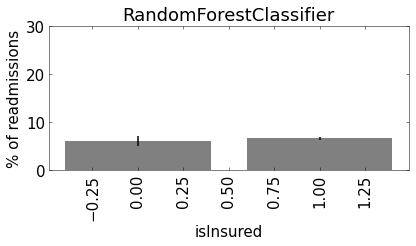

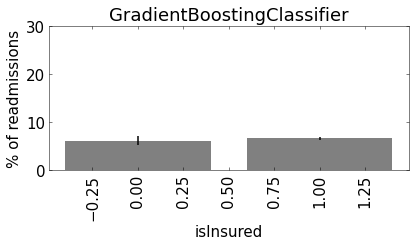

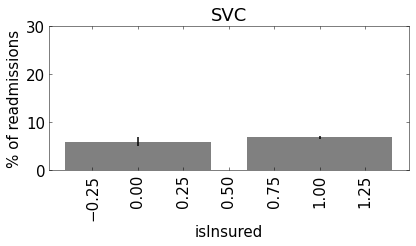

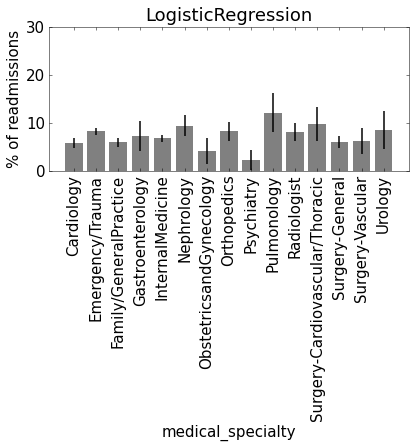

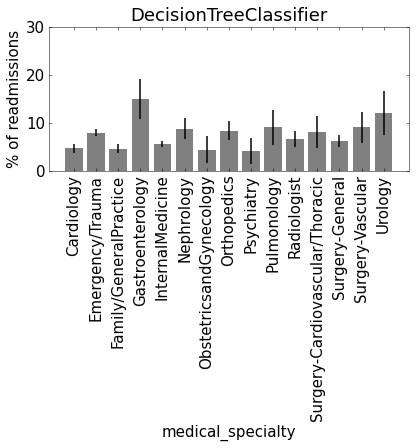

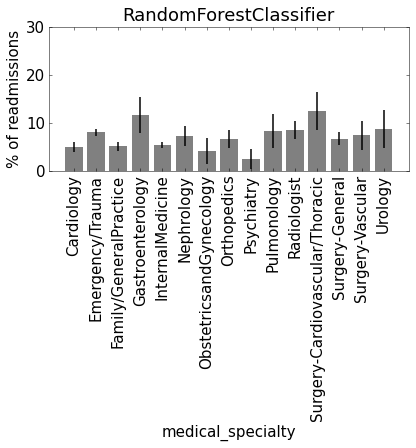

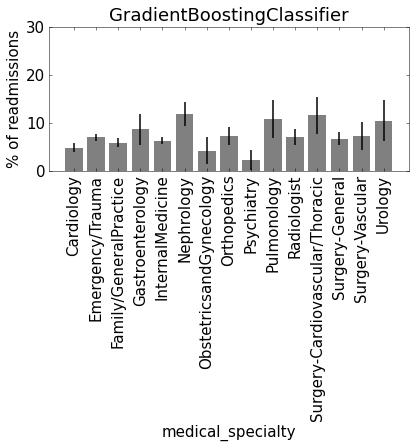

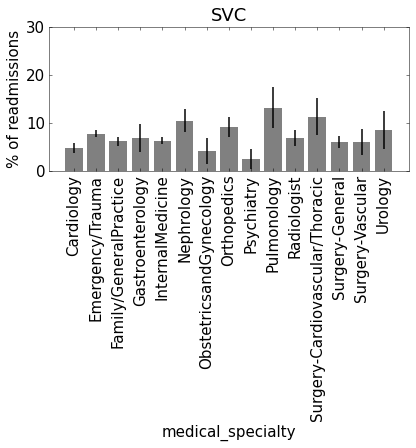

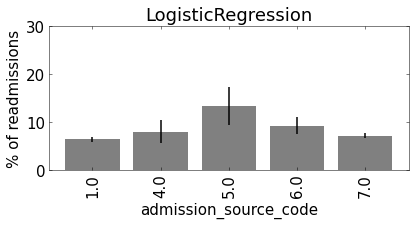

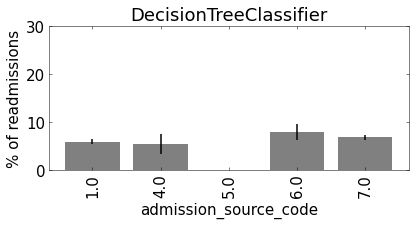

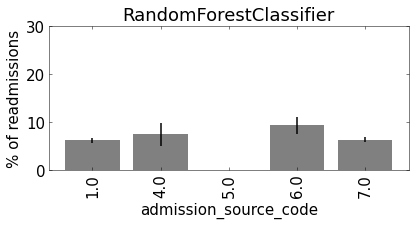

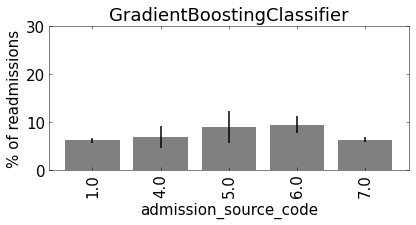

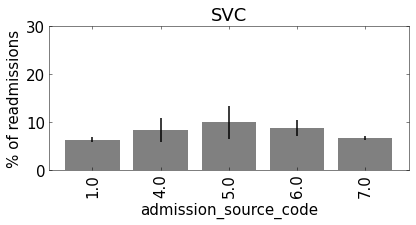

In [116]:

algorithms = ["LogisticRegression", "DecisionTreeClassifier", "RandomForestClassifier", "GradientBoostingClassifier", "SVC"]
for group in ["race", "age", "gender", "isInsured", "medical_specialty", "admission_source_code"]:

    best_subgroups = []
    worst_subgroups = []
    max_rates = []
    min_rates =[]

    for algorithm in algorithms:
        

        
        data_to_plot = check_for_bias(df_test, group,  "pred_proba_"+algorithm, 0.5, min_size=49)
        data_to_plot = data_to_plot.sort_values(by="sub_group")
        data_to_plot.readmittion_rate = data_to_plot.readmittion_rate*100
        fig, ax = plot_figure(5)

        sep = np.sqrt(list(data_to_plot["readmittion_rate"].values*(100- data_to_plot["readmittion_rate"].values)/(data_to_plot["size_of_test_data"].values)))
        ax.bar(data_to_plot["sub_group"], data_to_plot["readmittion_rate"].values, yerr = sep, color = bars_color)
        plt.xticks(rotation=90)
        plt.title(algorithm)

        ax.set_ylabel("% of readmissions")
        ax.set_xlabel(group)
        ax.set_ylim([0, 30])

        max_rate = max(data_to_plot.readmittion_rate)
        min_rate = min(data_to_plot.readmittion_rate)
        max_rate_subgroup = data_to_plot.sub_group.iloc[np.where(data_to_plot.readmittion_rate == max_rate)].values[0]
        min_rate_subgroup = data_to_plot.sub_group.iloc[np.where(data_to_plot.readmittion_rate == min_rate)].values[0]

        print(algorithm)
        print(max_rate_subgroup, max_rate)
        print(min_rate_subgroup, min_rate)
        print(max_rate-min_rate)
        print("#######")

        best_subgroups.append(min_rate_subgroup)
        worst_subgroups.append(max_rate_subgroup)
        max_rates.append(max_rate)
        min_rates.append(min_rate)

    df = pd.DataFrame([algorithms,worst_subgroups, max_rates,  best_subgroups, min_rates, [mx-mn for mx, mn in zip(max_rates, min_rates)]])
    df = df.transpose()
    df.columns = ["Classifier", "Group with highest rate", "Highest rate", "Group with lowest rate", "Lowest rate", "Difference"]
    df = df.set_index("Classifier", drop = True)
    df_styled = df.style.background_gradient()
    dfi.export(df_styled, group+"_table.png")


In [86]:
max_rates

[12.2, 15.0, 12.5, 15.38]

[0204/163919.880472:ERROR:gpu_init.cc(441)] Passthrough is not supported, GL is swiftshader
[0204/163920.662685:INFO:headless_shell.cc(648)] Written to file /tmp/tmpacnd71m2/temp.png.


,0,1,2,3,4,5
0,LogisticRegression,ObstetricsandGynecology,4.166667,Pulmonology,13.636364,9.469697
1,DecisionTreeClassifier,Psychiatry,2.777778,Urology,17.073171,14.295393
2,RandomForestClassifier,ObstetricsandGynecology,4.081633,Pulmonology,13.636364,9.554731


[0.52352589]
[0.19179856]
[0.49206349]


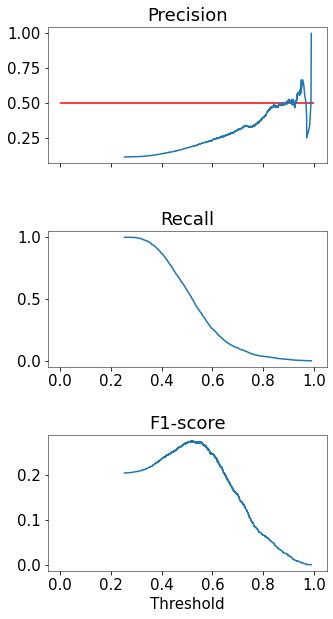

[0.55555556]
[0.18753727]
[0.464378]


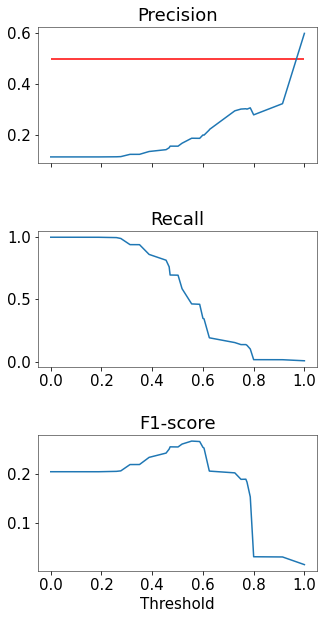

[0.52526524]
[0.19338648]
[0.48357327]


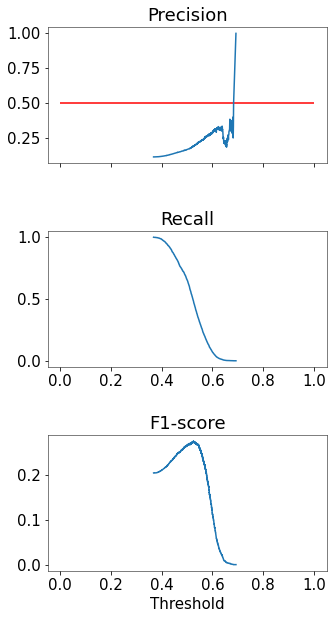

[0.55022171]
[0.20341369]
[0.42672573]


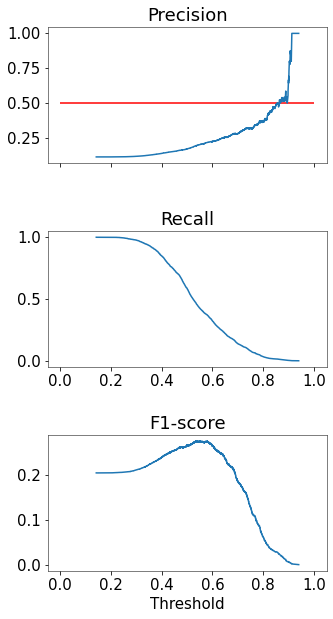

[0.52022898]
[0.18740592]
[0.55149502]


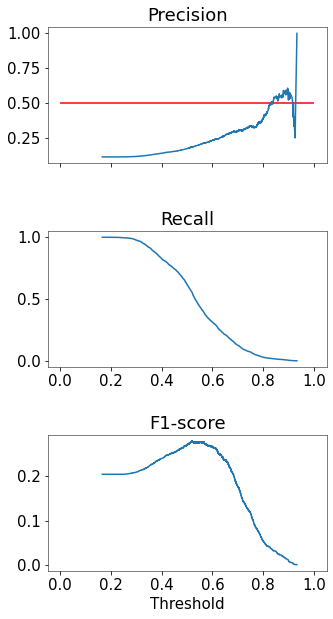

In [92]:
for algorithm in ["LogisticRegression", "DecisionTreeClassifier", "RandomForestClassifier", "GradientBoostingClassifier", "GradientBoostingClassifier2"]: #, "SVC"]:

    precision, recall, thresholds = precision_recall_curve(df_test.readmitted, df_test["pred_proba_"+algorithm])

    precision = precision[:-1]
    recall = recall[:-1]
    f1_score_result = 2*precision*recall/(precision+recall)



    fig, ax = plot_figure(fig_width=5, fig_height=10)
    ax1 = plt.subplot(311)
    ax2 = plt.subplot(312)
    ax3 = plt.subplot(313)

    ax1.hlines(y=0.5,xmin=0, xmax=1, colors='red')
    ax1.plot(thresholds,precision)
    ax2.plot(thresholds,recall)
    ax3.plot(thresholds,f1_score_result)

    ax1.get_shared_x_axes().join(ax1, ax2, ax3)
    ax1.set_xticklabels([])
    plt.xlabel('Threshold')
    ax1.set_title('Precision')
    ax2.set_title('Recall')
    ax3.set_title('F1-score')
    plt.subplots_adjust(hspace=0.5)

    print(thresholds[np.where(f1_score_result==max(f1_score_result))])

    print(precision[np.where(f1_score_result==max(f1_score_result))])
    print(recall[np.where(f1_score_result==max(f1_score_result))])


    plt.show()

In [52]:
thresholds[np.where(f1_score_result==max(f1_score_result))]

array([0.52526524])

In [55]:
precision[np.where(f1_score_result==max(f1_score_result))]

array([0.19338648])

,sub_group,readmittion_rate,size_of_test_data
0,Family/GeneralPractice,0.049661,772
1,Emergency/Trauma,0.062,1914
2,Surgery-General,0.051282,466
3,Radiologist,0.087156,297
4,Orthopedics-Reconstructive,0.03125,57
5,InternalMedicine,0.061742,1571
6,Surgery-Vascular,0.019231,98
7,Orthopedics,0.055118,247
8,Urology,0.039216,66
9,Cardiology,0.070796,632


In [ ]:
data_to_plot = check_for_bias(df_test_merge, "medical_specialty", joblib.load("pipeline_SVC.pickle"), 0.5)
data_to_plot.readmittion_rate = data_to_plot.readmittion_rate*100




(0.0, 30.0)

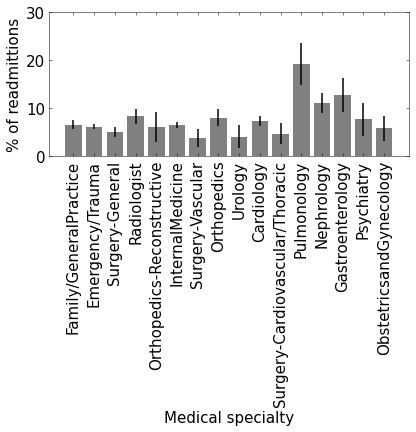

In [ ]:
fig, ax = plot_figure(5)

sep = np.sqrt(list(data_to_plot["readmittion_rate"].values*(100- data_to_plot["readmittion_rate"].values)/(data_to_plot["size_of_test_data"].values)))
ax.bar(data_to_plot["sub_group"], data_to_plot["readmittion_rate"].values, yerr = sep, color = bars_color)
plt.xticks(rotation=90)


ax.set_ylabel("% of readmittions")
ax.set_xlabel("Medical specialty")
ax.set_ylim([0, 30])

In [ ]:
data_to_plot["readmittion_rate"].values*(100- data_to_plot["readmittion_rate"].values)/data_to_plot["size_of_test_data"].values

array([0.006429629145399162, 0.0032372810867293627, 0.010999088582449428,
       0.029319865886653196, 0.05480742872807018, 0.0039276821044816205,
       0.019619460210119552, 0.022302724767392854, 0.059394405415166655,
       0.011194040947666965, 0.05148684323489011, 0.12651167302593289,
       0.039300723455700334, 0.14880642669063274, 0.08767313019390581,
       0.07735385175742122], dtype=object)

In [ ]:
# Save for deployment
with open(f'columns.json', 'w') as fh:
    json.dump(X_train_baseline.columns.tolist(), fh)
    
with open(f'dtypes.pickle', 'wb') as fh:
    pickle.dump(X_train_baseline.dtypes, fh)
    
joblib.dump(final_pipeline, f'pipeline_logisticRegression.pickle')